![title](image.png)

<h1>Feather Vision</h1>


<h2>1. Analysis</h2>


<style>
	p {
		line-height: 180%;
	}
</style>
<h3>1.1 Project description </h3>

<p>Ornithology enthusiasts and zoologists are people we thank for protecting and discovering new species on almost daily basis. Their jobs are already extremely difficult with the amount of information they have to keep track of while always being on the lookout for rare sightings of exotic birds.
With FeatherVision their job will be made much easier, when it comes to identifying numerous different species of birds.</p>
<p>The objective of our project is to create a machine learning model capable of accurately classifying bird species based on visual attributes in images. This way anyone could become a beginner ornithologist by simply capturing an image of their own and finding out the details of the fauna in their local area. And for those advanced in the field, they could spend more time taking care of endangered species and researching by decreasing the precious time needed to properly identify these species.</p> 
<p> The world of birds is enormous and with FeatherVision you will never get lost in it again!  </p>


<style>
	p {
		line-height: 180%;
	}
</style>
<h3>1.2 Business Objectve Definition</h3>

<p>We believe that our solution will help in multiple branches. First of all, as mentioned above,  ornithology would gain an easy to use tool for identifying bird species, which means that everyone could track the different species in their local area. Our solution could also serve for everyday use for people who's hobby it is to observe different bird species in their local are or when on vacation.</p>


<style>
	p {
		line-height: 180%;
	}
</style>

<h3>1.3 Framing the problem</h3>

<p>Our goal is to be able to identify bird species by just looking at them. You simply take a picture of the bird and our trained model will tell you what kind of bird this is. Since our dataset is fully lableled, meaning all the pictures have a label (bird species name) that the model can check, we chose the <b>Supervised Learning</b> approach. This means we will most likely choose a classification model to classify an image to a species' name.</p>


<style>
	p {
		line-height: 180%;
	}
</style>
<h3>1.4 Performance Metrics</h3>
<p>We've chosen accuracy as our main performance metric. Accuracy measures the proportion of correctly classified instances out of all instance.</p>
<p>We don't see any specific benefit in focusing on either precision or recall, which might be the case if we wanted to ensure a rare bird species is correctly identified (high recall) or to minimize missclasification among species (high precision).
To complement accuracy and gain deeper insights into our model's performance across different species, we'll also utilize a confusion matrix. This approach will help us identify how well the model differentiates between species and highlight areas for improvement.</p>


<style>
	p {
		line-height: 180%;
	}
</style>
<h2>2. Data exploration</h2>
<p>
We have decided to use birds classification dataset from <a href="https://www.kaggle.com/datasets/gpiosenka/100-bird-species">kaggle</a>. It contains 525 bird species, 84635 training images, 2625 test images, and 2625 validation images (5 images per species for both test and validation). The author of the dataset notes that the 'best' pictures were chosen for the test and validation data sets, so we might achieve slightly worse results if we split the data ourselves. This is not an issue, since we want to use the model on our own images anyway.
<h3>2.1 Notes on the dataset</h3>
<ul>
<li>All the images are photographed and not AI generated.</li>
<li>Each picture contains only one bird.</li>
<li>In most pictures, the pixels of the bird take up at least 50% of the image.</li>
<li>Around 80% of the images show male birds, which are typically much more colorful than females. This means that the model will perform considerably worse on female birds, especially if they look different from males.</li>
</ul>
</p>

<h3>2.2 Size and type of data</h3>
<p>
As mentioned earlier, the dataset contains almost 85K good quality images.   
<ul>
	<li>The images are sized 224 X 224 x 3 color channels (RGB) making them suitable as input to convoluted neural networks.</li>
	<li>The images are in JPG format.</li>
	<li>The average image size is around 20kB.</li>
	<li>The images are photographed during all seasons and it should contain species from every continent.</li>
</ul>
</p>


<h3>2.3 Features and it's characteristics</h3>
<p>
The table below shows a snippet of the .csv file containing the datapoints.</p>


In [1]:
import pandas as pd

rawData = pd.read_csv("./archive_exploration/birds.csv")

display(rawData)

class id                            filepaths                   labels  \
0           0.0        train/ABBOTTS BABBLER/001.jpg          ABBOTTS BABBLER   
1           0.0        train/ABBOTTS BABBLER/007.jpg          ABBOTTS BABBLER   
2           0.0        train/ABBOTTS BABBLER/008.jpg          ABBOTTS BABBLER   
3           0.0        train/ABBOTTS BABBLER/009.jpg          ABBOTTS BABBLER   
4           0.0        train/ABBOTTS BABBLER/002.jpg          ABBOTTS BABBLER   
...         ...                                  ...                      ...   
89880     524.0  valid/BLACK BREASTED PUFFBIRD/3.jpg  BLACK BREASTED PUFFBIRD   
89881     524.0  valid/BLACK BREASTED PUFFBIRD/4.jpg  BLACK BREASTED PUFFBIRD   
89882     524.0  valid/BLACK BREASTED PUFFBIRD/1.jpg  BLACK BREASTED PUFFBIRD   
89883     524.0  valid/BLACK BREASTED PUFFBIRD/2.jpg  BLACK BREASTED PUFFBIRD   
89884     524.0  valid/BLACK BREASTED PUFFBIRD/5.jpg  BLACK BREASTED PUFFBIRD   

      data set        scientific name  
0        train   MALACOCINCLA ABBOTTI  
1        train   MALACOCINCLA ABBOTTI  
2        train   MALACOCINCLA ABBOTTI  
3        train   MALACOCINCLA ABBOTTI  
4        train   MALACOCINCLA ABBOTTI  
...        ...                    ...  
89880    valid  NOTHARCHUS PECTORALIS  
89881    valid  NOTHARCHUS PECTORALIS  
89882    valid  NOTHARCHUS PECTORALIS  
89883    valid  NOTHARCHUS PECTORALIS  
89884    valid  NOTHARCHUS PECTORALIS  

[89885 rows x 5 columns]

<style>
	p {
		line-height: 180%;
	}
</style>
<p>As we can see above, the dataset has almost 90000 datapoints and 5 different features - <b><i>class id</i></b>, <b><i>filepaths</i></b>, <b><i>labels</i></b>, <b><i>dataset</i></b>, and <b><i>scientific name</i></b>. The <b><i>class id</i></b>, <b><i>labels</i></b>, and <b><i>scientific name</i></b> are self explanatory, the <b><i>filepaths</i></b> is a string which contains a path to the image of that particular datapoint. In the feature  <b><i>data set</i></b> we can see that the author of the dataset has already divided the data into train, valid, and test splits. </p>


In [2]:
# Check the feature's data types
print(rawData.dtypes)

print("\n\n")

# Print how many different values there are in each feature
for column in rawData.columns:
    print(column, ":", len(rawData[column].unique()))

class id           float64
filepaths           object
labels              object
data set            object
scientific name     object
dtype: object



class id : 525
filepaths : 89885
labels : 525
data set : 3
scientific name : 522


<style>
	p {
		line-height: 180%;
	}
</style>
<p>The feature datatypes are mostly objects as printed out above. That means that its values are categorical. The least categories are in the <b><i>data set</i></b> feature - 3 and the most is of course in the <b><i>filepaths</i></b> as each of those values should be unique. What is interesting is that the number of values for features <b><i>labels</i></b> and <b><i>scientific name</i></b> are not the same, 525 : 522. Let's investigate that further.</p>


In [3]:
print(
    rawData.groupby("scientific name")["labels"].nunique().sort_values(ascending=False)
)

print("\n\n")
print(
    "PSITTACULA EUPATRIA:",
    rawData[rawData["scientific name"] == "PSITTACULA EUPATRIA"]["labels"].unique(),
)
print(
    "COLAPTES AURATUS:",
    rawData[rawData["scientific name"] == "COLAPTES AURATUS"]["labels"].unique(),
)
print(
    "COLUMBA LIVIA:",
    rawData[rawData["scientific name"] == "COLUMBA LIVIA"]["labels"].unique(),
)

scientific name
PSITTACULA EUPATRIA         2
COLAPTES AURATUS            2
COLUMBA LIVIA               2
PASSERINA CYANEA            1
PARIDAE                     1
                           ..
DENDRAGAPUS OBSCURUS        1
DELICHON URBICUM            1
DACNIS CAYANA               1
DACELO                      1
ZOSTEROPS MADERASPATANUS    1
Name: labels, Length: 522, dtype: int64



PSITTACULA EUPATRIA: ['ALEXANDRINE PARAKEET' 'AMERICAN AVOCET']
COLAPTES AURATUS: ['GILDED FLICKER' 'NORTHERN FLICKER']
COLUMBA LIVIA: ['JACOBIN PIGEON' 'ROCK DOVE']


<style>
	p {
		line-height: 180%;
	}
</style>
<p>As it turns out there are 3 <b><i>scientific names</b></i> where each of them maps to 2 different <b><i>labels</b></i>, as you can see above. This indicates that the best idea is to classify by the <b><i>labels</b></i> feature as doing otherwise would cause the model to be unsufficient.</p>


In [4]:
# Check the percentage of missing values in each feature
print(rawData.isnull().mean())

# Check if there are any duplicate rows
print("\nNumber of duplicated rows:", rawData.duplicated().sum())

class id           0.0
filepaths          0.0
labels             0.0
data set           0.0
scientific name    0.0
dtype: float64

Number of duplicated rows: 0


<style>
	p {
		line-height: 180%;
	}
</style>
<p>Since we chose a well maintained dataset for our project we can see that there is 0 data missing, which means we can use the whole dataset without worries. We also checked if there are any duplicates in the dataset, it turns out there are not but it is a good habit to check that because if there were any duplicates we would like to get rid of them. The reason is that if one of the duplicates would be in the training set and another one in the test set it would compromise the performance of our model.</p>


<style>
	p {
		line-height: 180%;
	}
</style>
<h4>2.4 Image data exploration</h4>


<style>
	p {
		line-height: 180%;
	}
</style>
<p>For illustration purposes, one of the bird pictures is shown below. The numbers on x and y axis represent the pixels of the image, as mentioned before, the images are 224x224 pixels.</p>


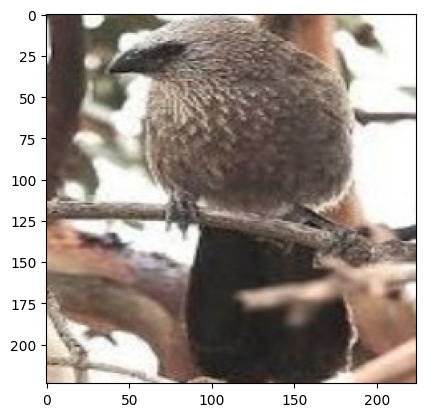

In [5]:
from PIL import Image
import matplotlib.pyplot as plt

base_path = "./archive_exploration/"

img_path = base_path + rawData.loc[5325, "filepaths"]

img = Image.open(img_path)
plt.imshow(img)
plt.show()

<style>
	p {
		line-height: 180%;
	}
</style>
<p>Now lets investigate how our model will actually see this picture. There are 3 channels in each picture - Height, Width, Channels. Height and Width are the number of pixels on y and x axes respectively. Channels represent how many color components (3 in rgb - red, green, blue) are used to represent each pixel (the value of a channel is between 0-255 and tells us with what intensity is that color channel present in the pixel).</p>


Image shape: (224, 224, 3)


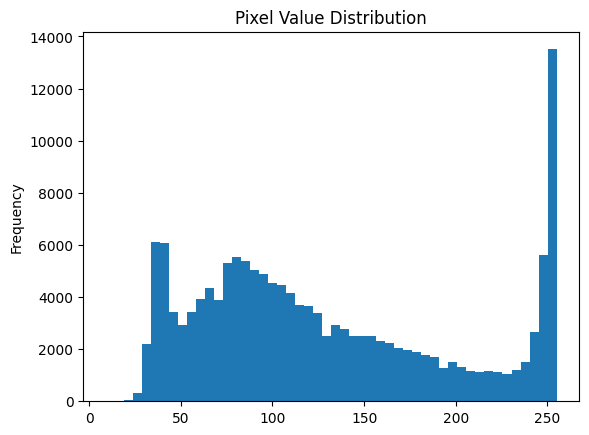

In [6]:
img_plt = plt.imread(img_path)

print("Image shape:", img_plt.shape)
pd.Series(img_plt.flatten()).plot(
    kind="hist", bins=50, title="Pixel Value Distribution"
)
plt.show()

<style>
	p {
		line-height: 180%;
	}
</style>
<p>In the image above we can see the pixel value distribution. From the histogram we can read that the data (pixel values) are right skewed. This is a common occurance in pixel value distributions, especially innatural images, as there tends to be a lot of shadows and darkened areas, therefore a bigger concentration of lower value pixels.</p>

<p>We can also notice that the image shape is 224x224x3, as all of our images are the size of 224x224 and are colored, this will be the some for all of them. If we would like to display the image as black & white it would only show the 224x224 as the black & white only uses one color channel - grey</p>


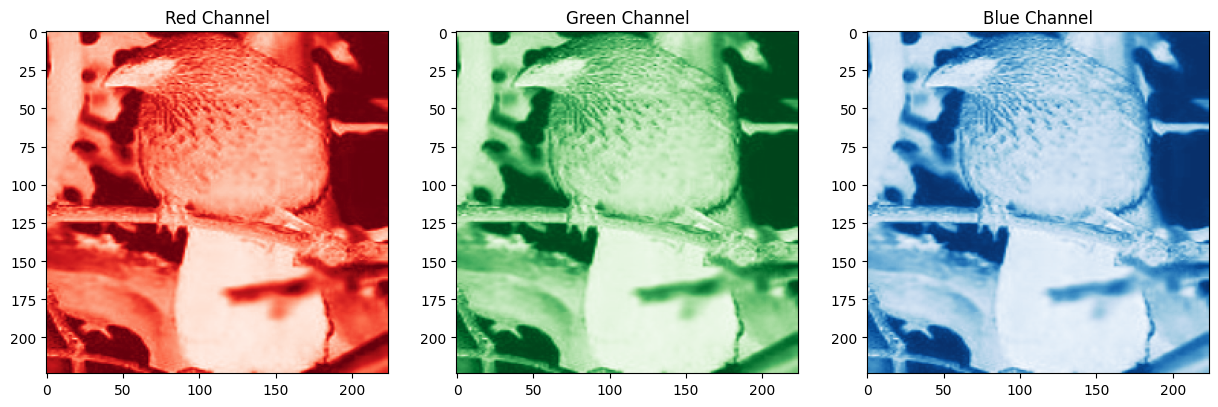

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(img_plt[:, :, 0], cmap="Reds")
ax[0].set_title("Red Channel")
ax[1].imshow(img_plt[:, :, 1], cmap="Greens")
ax[1].set_title("Green Channel")
ax[2].imshow(img_plt[:, :, 2], cmap="Blues")
ax[2].set_title("Blue Channel")
plt.show()

<style>
	p {
		line-height: 180%;
	}
</style>
<p>The red, green, and value images of a bird above are representations of the color channel distribution in the image. We can notice that in this particular image all the colors are distributed quite evenly.</p>


<style>
	p {
		line-height: 180%;
	}
</style>
<p>Just for an illustration, in the diagrams below, you can see how a pixel distribution of different pictures looks like:</p>

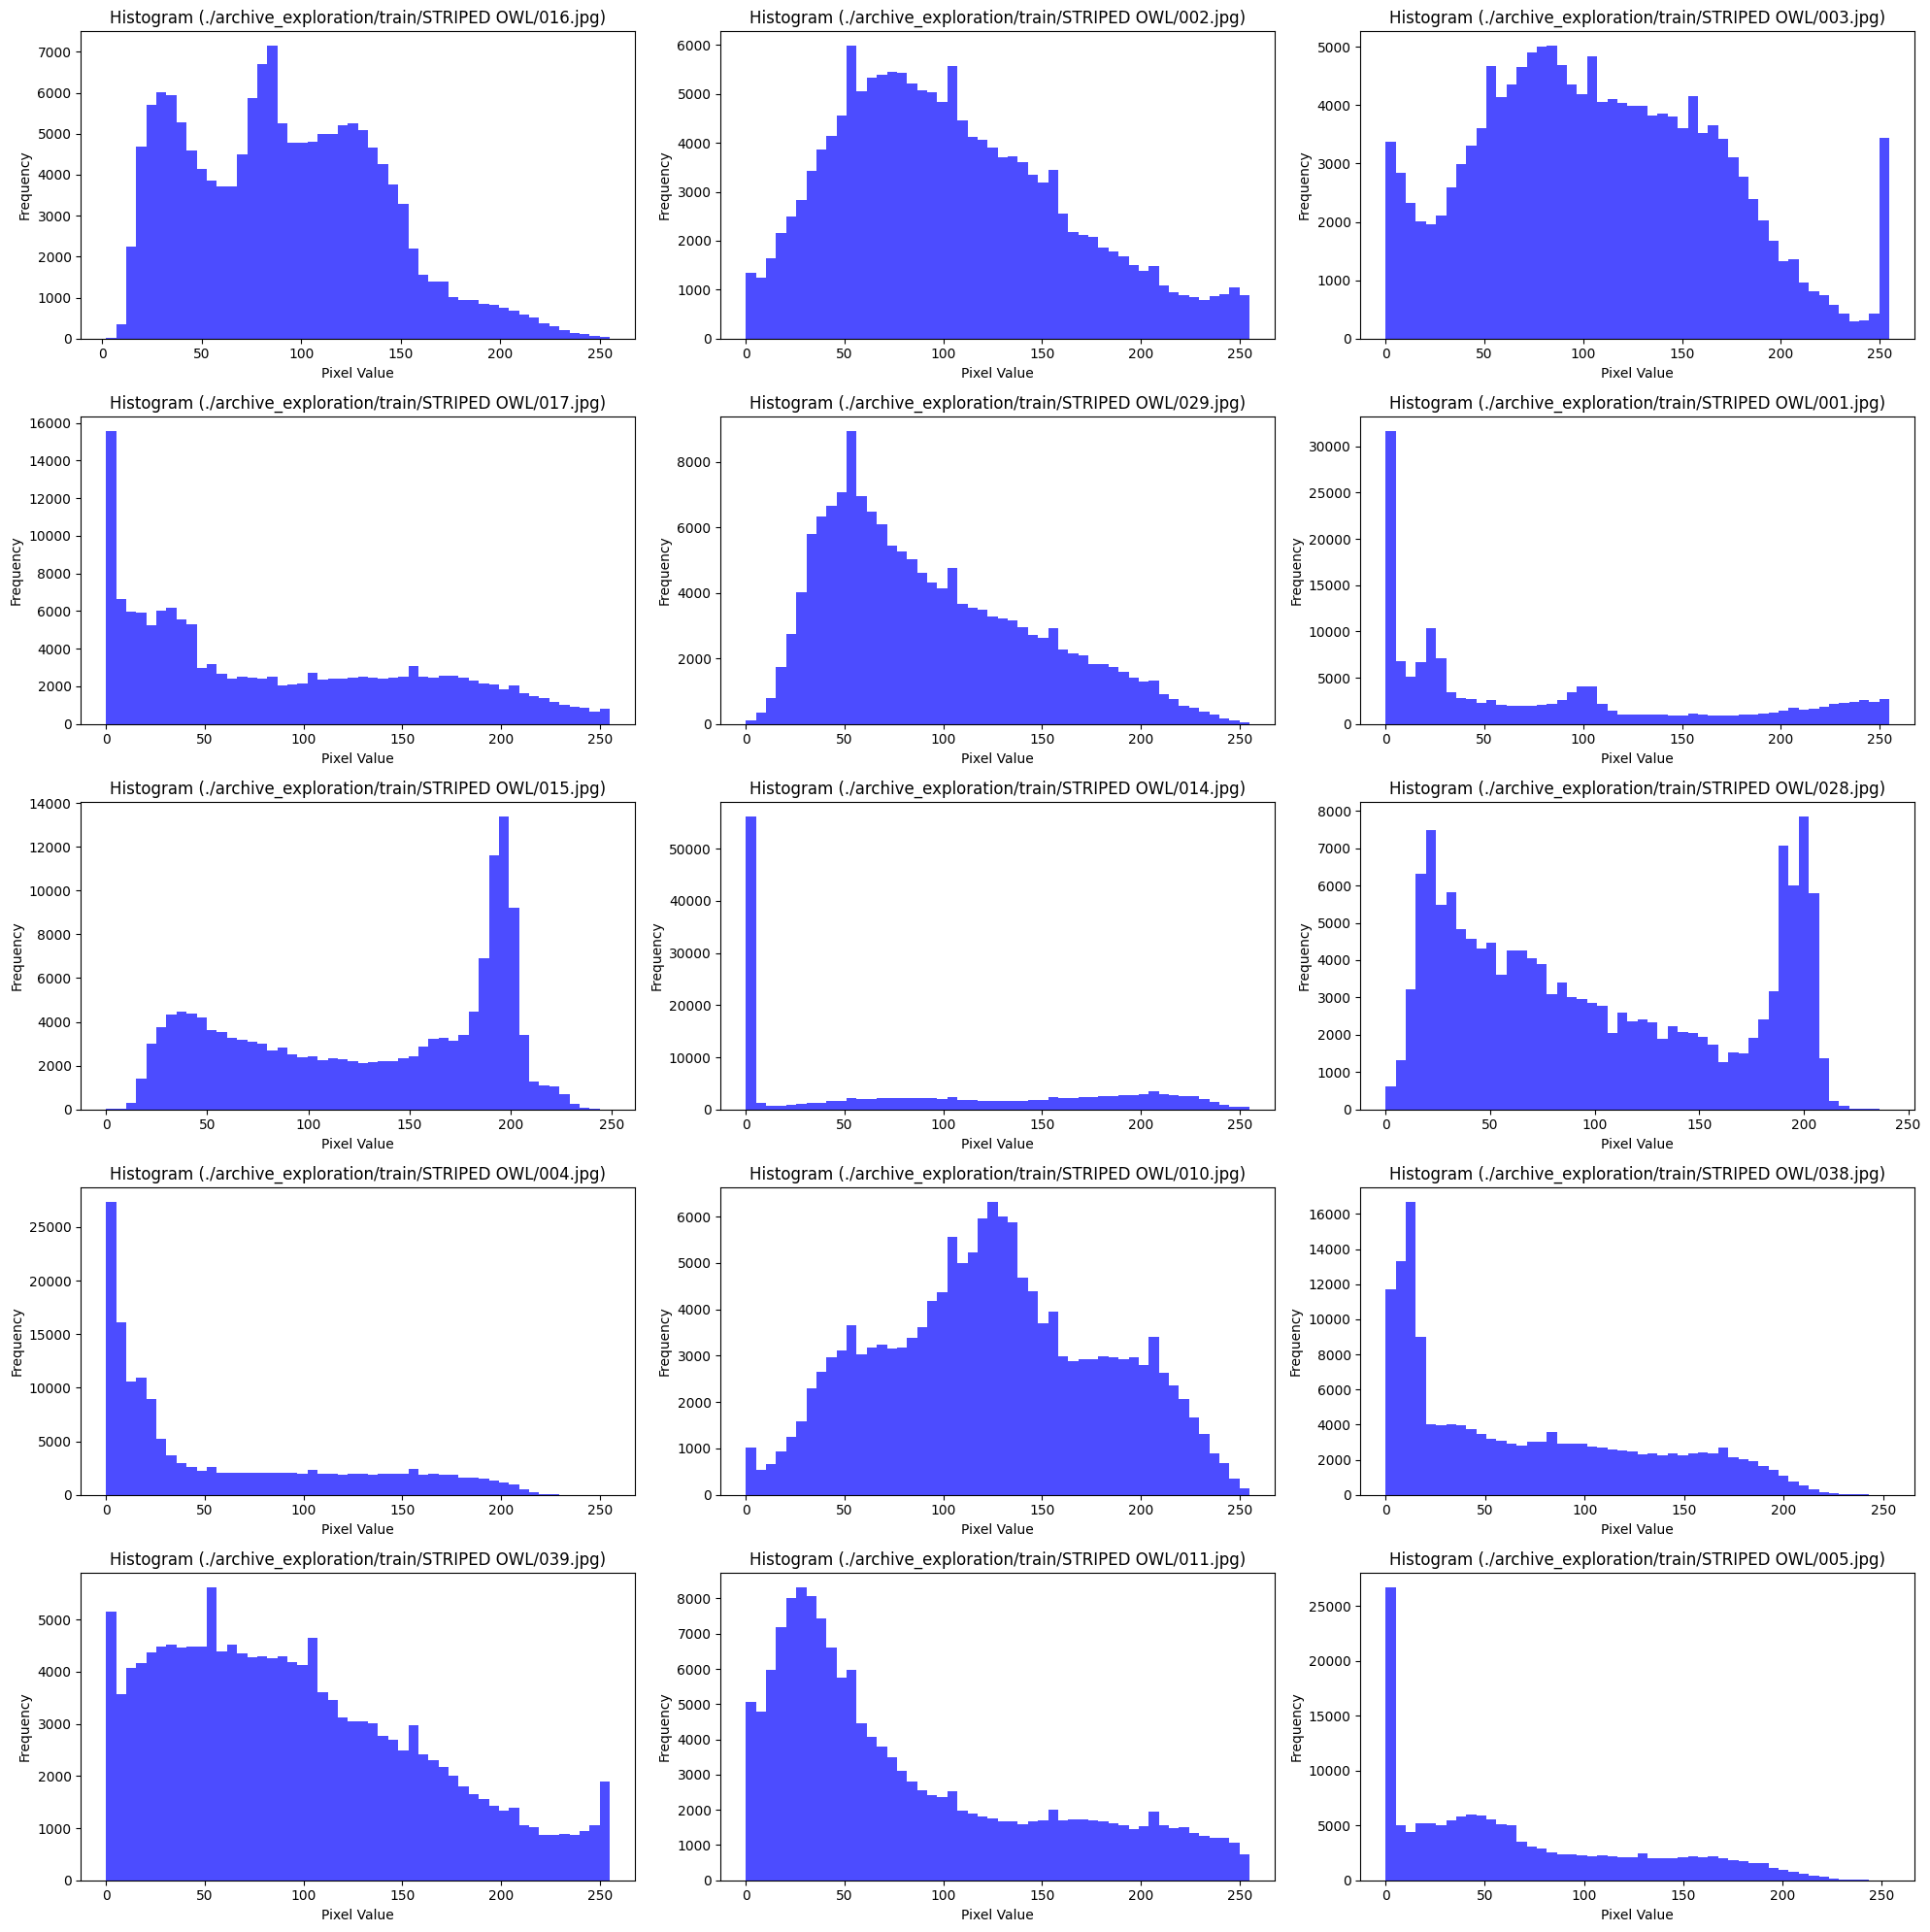

In [8]:
import glob

directory_path = "./archive_exploration/train/STRIPED OWL/"
image_files = glob.glob(directory_path + "*.jpg")[
    :15
] 

num_rows = 5
num_cols = 3
total_plots = num_rows * num_cols

for i in range(0, len(image_files), total_plots):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
    for j, image_file in enumerate(image_files[i : i + total_plots]):
        img_plt = plt.imread(image_file)
        flattened_pixels = img_plt.ravel()
        row_pos = j // num_cols
        col_pos = j % num_cols

        axes[row_pos, col_pos].hist(flattened_pixels, bins=50, color="blue", alpha=0.7)
        axes[row_pos, col_pos].set_title(f"Histogram ({image_file})")
        axes[row_pos, col_pos].set_xlabel("Pixel Value")
        axes[row_pos, col_pos].set_ylabel("Frequency")

    plt.tight_layout()
    plt.show()

<style>
	p {
		line-height: 180%;
	}
</style>
<h4>2.5 Identifying the target</h4>

<p>Our target is the feature <b><i>labels</i></b>. As argumented before it is a better choice than <b><i>scientific name</i></b> because of the duplicates present in that feature.</p>


<h2>3. Data preparation</h2>
<p>The main goal of the project is to enable the user to upload a picture of the bird and the model will identify the species. In the first steps the model is trained on the data in the existing dataset. This dataset contains images of predefined size with an aspect ratio of 1. This means that in order to use custom pictures, they have to be cropped and resized to the desired size and aspect ratio. </p>
<p>The code below aims to do exactly that. It uses a pre-trained Faster R-CNN model trained on the COCO dataset to identify a bird in the provided picture. The screenshot below shows a part of supported objects with their IDs. When the bird is identified (output label is 16, ID of a bird), size of a bounding box is established and the bird in the picture is cropped. The size of the box can be adjusted by changing the padding value. Another parameter that can be adjusted is how the bird is identified in the picture. By default, the pre-trained model chooses the prediction with the highest confidence score. If the useLargestBird argument is set to true, the model will pick the largest identified bird in the picture, which might be useful when there's multiple recognized objects.</p> 
<p> At this point, the image still has the wrong aspect ratio, so it is resized using the Lanczos resampling filter. (https://pillow.readthedocs.io/en/stable/handbook/concepts.html#concept-filters) This action, however, distorts the bird, which might affect the accuracy of the species identification. </p> 
<p>Another way of handling the distortion when resizing images is to add 'zero padding' - borders of pixels with a value of zero (black) around an image to reach the desired size while keeping the aspect ratio. By setting showOutput=True in the detect_birds() method, all the versions of the entered picture are shown. These variations will then be used on the photos fed to the trained model to determine the best way of preprocessing the images.</p>


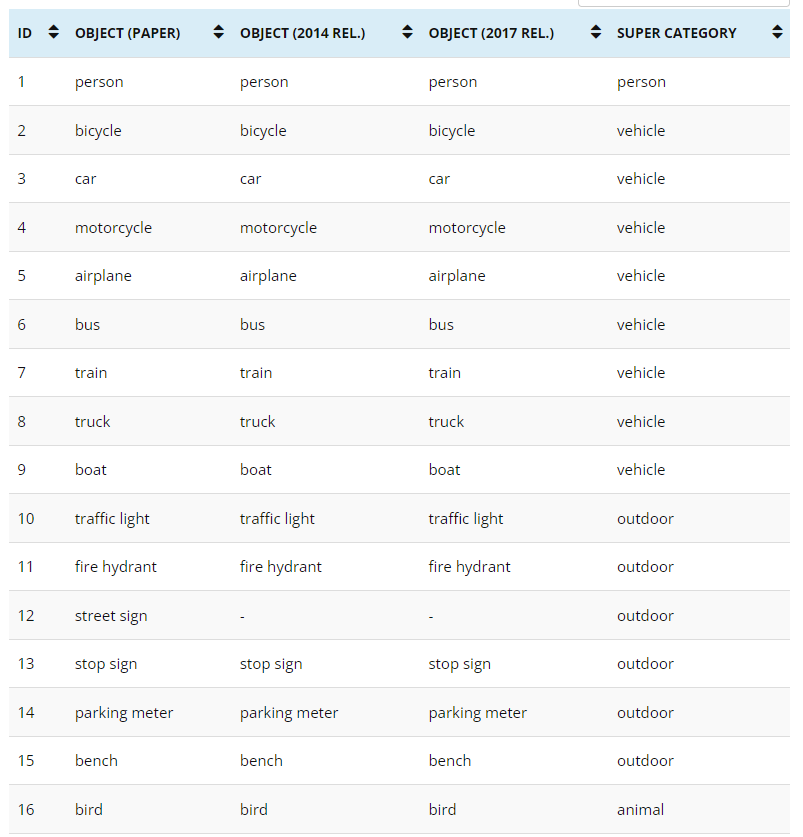 <br>
source: https://tech.amikelive.com/node-718/what-object-categories-labels-are-in-coco-dataset/


---------------------------------------------------

<h2>4. Trying out different models</h2>

<style>
	p {
		line-height: 180%;
	}
</style>
<h3> Support Vector Machine Approach </h3>


<style>
	p {
		line-height: 180%;
	}
</style>
<h4> Pixel Distribution </h4>
<p> In this section we will attempt to train a support vector machine to classify images based on their pixel distribution. The idea is that the machine will learn to recognize the patterns between these pixel distributions and will then be able to predict the label of the bird on the image from the histogram with the pixel distribution.</p>


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


def getPixelValueDistribution(image):
    img_plt = plt.imread(image)
    pixel_values = img_plt.flatten()
    # Calculate histogram
    hist, _ = np.histogram(pixel_values, bins=256, range=(0, 256), density=True)
    return hist


# Read the CSV file
svm_data = pd.read_csv("archive_exploration/birds.csv")

# Filter the training data
svm_data_train = svm_data

dfs = []

# Initialize an empty DataFrame to store the pixel distribution data
svm_df_train = pd.DataFrame(columns=["label", "pixel_distribution"])

# Iterate over each image in the training dataset
for index, row in svm_data_train.iterrows():
    image_path = "./archive_exploration/" + row["filepaths"]
    label = row["labels"]

    if os.path.exists(image_path):
        # Compute pixel distribution histogram
        histogram_data = getPixelValueDistribution(image_path)
        # Create DataFrame for current image
        df = pd.DataFrame({"label": [label], "pixel_distribution": [histogram_data]})
        # Append to list of DataFrames
        dfs.append(df)

    # Append label and pixel distribution to the DataFrame
svm_df_train = pd.concat(dfs, ignore_index=True)

In [10]:
svm_df_train

label  \
0                  APOSTLEBIRD   
1                  APOSTLEBIRD   
2                  APOSTLEBIRD   
3                  APOSTLEBIRD   
4                  APOSTLEBIRD   
...                        ...   
3865  WHITE THROATED BEE EATER   
3866  WHITE THROATED BEE EATER   
3867  WHITE THROATED BEE EATER   
3868  WHITE THROATED BEE EATER   
3869  WHITE THROATED BEE EATER   

                                     pixel_distribution  
0     [0.0004849596088435374, 0.00017272534013605442...  
1     [0.0023185055272108845, 0.0012755102040816326,...  
2     [0.001634247448979592, 0.0015943877551020409, ...  
3     [0.0024845875850340138, 0.0008569834183673469,...  
4     [0.0005779655612244898, 0.000352093962585034, ...  
...                                                 ...  
3865  [0.01881377551020408, 0.005686649659863946, 0....  
3866  [0.0020195578231292518, 0.000744047619047619, ...  
3867  [0.028147587159863947, 0.01815609056122449, 0....  
3868  [0.0023982249149659862, 0.00042517006802721087...  
3869  [0.00023915816326530612, 5.978954081632653e-05...  

[3870 rows x 2 columns]

In [11]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
import numpy as np
from sklearn.metrics import recall_score

# Split the data into features (pixel distributions) and labels
X = np.array(list(svm_df_train["pixel_distribution"]))
y = np.array(svm_df_train["label"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
svm_model = svm.SVC(kernel="rbf")

# Train the classifier
svm_model.fit(X_train, y_train)

print("Train Accuracy:", svm_model.score(X_train, y_train))
print("Test Accuracy:", svm_model.score(X_test, y_test))

Train Accuracy: 0.3242894056847545
Test Accuracy: 0.16925064599483206


In [12]:
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Define the parameter grid
param_grid = {"kernel": ["linear", "poly", "rbf", "sigmoid"]}

# Initialize SVM classifier
svm_clf = svm.SVC()

# Perform grid search cross-validation
grid_search = GridSearchCV(svm_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the results as a DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Print the results
print(results_df[["param_kernel", "mean_test_score", "std_test_score"]])

  param_kernel  mean_test_score  std_test_score
0       linear         0.055232        0.000610
1         poly         0.159229        0.014748
2          rbf         0.174737        0.011992
3      sigmoid         0.057174        0.006373


<style>
	p {
		line-height: 180%;
	}
</style>
<p> Conclusion: The pixel distribution histograms do not hold enough information for deriving patterns that could be used for model learning. </p>

<style>
	p {
		line-height: 180%;
	}
</style>
<h4> Feature Vectors </h4>
<p>Just using the pixel distribution was not enough for the model to classify the image with high accuracy, therefore we will try a different approach. We found a library on GitHub: Img2Vec, which is exctracting feature vector embeddings from the image (color informations, edges and textures, shapes and structures). This gives the model way more information than just the pixel distribution so let's see if there is any noticable improvement in our model using this method.</p>

Img2Vec (by christiansafka) GitHub repo: [Img2Vec](https://github.com/christiansafka/img2vec)

In [13]:
from img2vec_pytorch import Img2Vec
import pandas as pd
from PIL import Image
import os

img2vec = Img2Vec()

# Read the CSV file
rf_data = pd.read_csv('archive_exploration/birds.csv')

rf_data_train = rf_data
dfs = []
rf_df_train = pd.DataFrame(columns=['label', 'img_features'])

for index, row in rf_data_train.iterrows():
    image_path = './archive_exploration/' + row['filepaths']
    label = row['labels']

    if os.path.exists(image_path):
        print("processing image:", image_path)
        img = Image.open(image_path)
        img_features = img2vec.get_vec(img)
        df = pd.DataFrame({'label': [label], 'img_features': [img_features]})
        dfs.append(df)

rf_df_train = pd.concat(dfs, ignore_index=True)

display(rf_df_train)

/Users/dksimmay/Documents/VIA/Semester6/MAL1/FeatherVision/venv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/dksimmay/Documents/VIA/Semester6/MAL1/FeatherVision/venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


processing image: ./archive_exploration/train/APOSTLEBIRD/006.jpg
processing image: ./archive_exploration/train/APOSTLEBIRD/024.jpg
processing image: ./archive_exploration/train/APOSTLEBIRD/012.jpg
processing image: ./archive_exploration/train/APOSTLEBIRD/027.jpg
processing image: ./archive_exploration/train/APOSTLEBIRD/015.jpg
processing image: ./archive_exploration/train/APOSTLEBIRD/014.jpg
processing image: ./archive_exploration/train/APOSTLEBIRD/017.jpg
processing image: ./archive_exploration/train/APOSTLEBIRD/107.jpg
processing image: ./archive_exploration/train/APOSTLEBIRD/016.jpg
processing image: ./archive_exploration/train/APOSTLEBIRD/008.jpg
processing image: ./archive_exploration/train/APOSTLEBIRD/010.jpg
processing image: ./archive_exploration/train/APOSTLEBIRD/002.jpg
processing image: ./archive_exploration/train/APOSTLEBIRD/011.jpg
processing image: ./archive_exploration/train/APOSTLEBIRD/106.jpg
processing image: ./archive_exploration/train/APOSTLEBIRD/005.jpg
processing

label  \
0                  APOSTLEBIRD   
1                  APOSTLEBIRD   
2                  APOSTLEBIRD   
3                  APOSTLEBIRD   
4                  APOSTLEBIRD   
...                        ...   
3865  WHITE THROATED BEE EATER   
3866  WHITE THROATED BEE EATER   
3867  WHITE THROATED BEE EATER   
3868  WHITE THROATED BEE EATER   
3869  WHITE THROATED BEE EATER   

                                           img_features  
0     [1.035571, 0.74095047, 1.4537542, 2.5809584, 0...  
1     [0.13804962, 0.60562074, 1.0496209, 0.9587047,...  
2     [0.0633112, 2.6116605, 0.84730077, 0.9065618, ...  
3     [0.9157694, 0.7168912, 0.45692942, 1.1777925, ...  
4     [0.32371846, 1.3845364, 0.26155278, 1.4173576,...  
...                                                 ...  
3865  [1.7491652, 2.0569856, 1.6732953, 0.9645689, 0...  
3866  [0.71773076, 2.3978224, 1.34499, 0.71550196, 0...  
3867  [0.32952052, 1.6160948, 2.8507843, 1.607729, 1...  
3868  [1.1521937, 1.4187881, 1.2721434, 1.5108825, 0...  
3869  [0.328729, 0.6824608, 0.38780764, 2.0343037, 0...  

[3870 rows x 2 columns]

In [14]:
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np

print("\nTraining the model: \n\n")

X = np.array(list(rf_df_train['img_features']))
y = np.array(rf_df_train['label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm_model = svm.SVC(kernel='rbf')

# Train the classifier
svm_model.fit(X_train, y_train)

#Print the train and test accuracy
y_pred_train = svm_model.predict(X_train)
y_pred_test = svm_model.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')

print("Train Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)

print("Test Precision:", precision_test)
print("Test Recall:", recall_test)



Training the model: 


Train Accuracy: 0.9925710594315246
Test Accuracy: 0.9534883720930233
Test Precision: 0.9555101879555763
Test Recall: 0.9534883720930233


In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid
param_grid = {'C': [0.01, 1.0, 0.4],
              'gamma': ['scale', 0.001, 1.0],
              'kernel': ['rbf']}

# Instantiate the GridSearchCV object
grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)
print("Best Estimator:", grid.best_estimator_)
results = grid.cv_results_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ...C=0.01, gamma=scale, kernel=rbf;, score=0.056 total time=   1.5s
[CV 2/5] END ...C=0.01, gamma=scale, kernel=rbf;, score=0.057 total time=   1.5s
[CV 3/5] END ...C=0.01, gamma=scale, kernel=rbf;, score=0.055 total time=   1.5s
[CV 4/5] END ...C=0.01, gamma=scale, kernel=rbf;, score=0.055 total time=   1.5s
[CV 5/5] END ...C=0.01, gamma=scale, kernel=rbf;, score=0.055 total time=   1.5s
[CV 1/5] END ...C=0.01, gamma=0.001, kernel=rbf;, score=0.056 total time=   1.5s
[CV 2/5] END ...C=0.01, gamma=0.001, kernel=rbf;, score=0.057 total time=   1.5s
[CV 3/5] END ...C=0.01, gamma=0.001, kernel=rbf;, score=0.055 total time=   1.5s
[CV 4/5] END ...C=0.01, gamma=0.001, kernel=rbf;, score=0.055 total time=   1.5s
[CV 5/5] END ...C=0.01, gamma=0.001, kernel=rbf;, score=0.055 total time=   1.5s
[CV 1/5] END .....C=0.01, gamma=1.0, kernel=rbf;, score=0.056 total time=   1.6s
[CV 2/5] END .....C=0.01, gamma=1.0, kernel=rbf;,

In [16]:

# Print the accuracy for all combinations of C and gamma
print("Accuracy for all combinations of C and gamma:")
for c, gamma, mean_test_score in zip(results['param_C'], results['param_gamma'], results['mean_test_score']):
    clf = svm.SVC(C=c, gamma=gamma, kernel='rbf')
    clf.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, clf.predict(X_train))
    test_accuracy = accuracy_score(y_test, clf.predict(X_test))
    print(f"C={c}, gamma={gamma}, Train Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}")


Accuracy for all combinations of C and gamma:
C=0.01, gamma=scale, Train Accuracy: 0.05555555555555555, Test Accuracy: 0.05167958656330749
C=0.01, gamma=0.001, Train Accuracy: 0.05555555555555555, Test Accuracy: 0.05167958656330749
C=0.01, gamma=1.0, Train Accuracy: 0.05555555555555555, Test Accuracy: 0.05167958656330749
C=1.0, gamma=scale, Train Accuracy: 0.9925710594315246, Test Accuracy: 0.9534883720930233
C=1.0, gamma=0.001, Train Accuracy: 0.9857881136950905, Test Accuracy: 0.9483204134366925
C=1.0, gamma=1.0, Train Accuracy: 1.0, Test Accuracy: 0.05167958656330749
C=0.4, gamma=scale, Train Accuracy: 0.9851421188630491, Test Accuracy: 0.9405684754521964
C=0.4, gamma=0.001, Train Accuracy: 0.9712532299741602, Test Accuracy: 0.9405684754521964
C=0.4, gamma=1.0, Train Accuracy: 0.05555555555555555, Test Accuracy: 0.05167958656330749


<h4> Hyperparameter tuning </h4>
<p> It seems that we are experiencing some overfitting so we will try to fine-tune the hyperparameters. We will use the C and gamma parameters. C is is a regularization parameter used for penalizing and gamma gives the boundary complexity. </p>

- Parameters: {'C': 1.0, 'gamma': scale, 'kernel': 'rbf'}
    - Train Accuracy: 0.9925710594315246
    - Test Accuracy: 0.9509043927648578

---

- Parameters: {'C': 1.0, 'gamma': 0.001, 'kernel': 'rbf'}
    - Train Accuracy: 0.9854651162790697
    - Test Accuracy: 0.9509043927648578


---

- Parameters: {'C': 0.4, 'gamma': 'scale', 'kernel': 'rbf'}
    - Train Accuracy: 0.9857881136950905
    - Test Accuracy: 0.9444444444444444
    
---

- Parameters: {C=0.4, gamma=0.001, 'kernel':'rbf}
    - Train Accuracy: 0.9728682170542635
    - Test Accuracy: 0.9418604651162791

--- 

<p> Overall, the combination C=1.0 and gamma='scale' seems to perform the best in terms of test accuracy. However, C=1.0 and gamma=0.001 also perform similarly. Both combinations seem to have similar test accuracies but slightly different training accuracies. The combination with lower C still gets good results, alebit a little bit lower. For Support Vector Machines, a large margin (low C) combined with a less complex boundary (low gamma) often leads to better generalization performance.</p>

Most common misclassification for label RED TAILED HAWK was RED SHOULDERED HAWK: 3
Most common misclassification for label WHITE TAILED TROPIC was RED BILLED TROPICBIRD: 5
Most common misclassification for label RED SHOULDERED HAWK was RED TAILED HAWK: 6
Most common misclassification for label RED BELLIED PITTA was RED NAPED TROGON: 1
Most common misclassification for label RED BILLED TROPICBIRD was WHITE TAILED TROPIC: 3
Most common misclassification for label STRIATED CARACARA was APOSTLEBIRD: 2
Most common misclassification for label RED NAPED TROGON was BORNEAN BRISTLEHEAD: 1
Most common misclassification for label EMERALD TANAGER was BORNEAN LEAFBIRD: 2
Most common misclassification for label ASHY STORM PETREL was APOSTLEBIRD: 1
Most common misclassification for label SUPERB STARLING was VENEZUELIAN TROUPIAL: 1
Most common misclassification for label BORNEAN BRISTLEHEAD was ENGGANO MYNA: 2
Most common misclassification for label ASHY THRUSHBIRD was APOSTLEBIRD: 1
Most common miscl

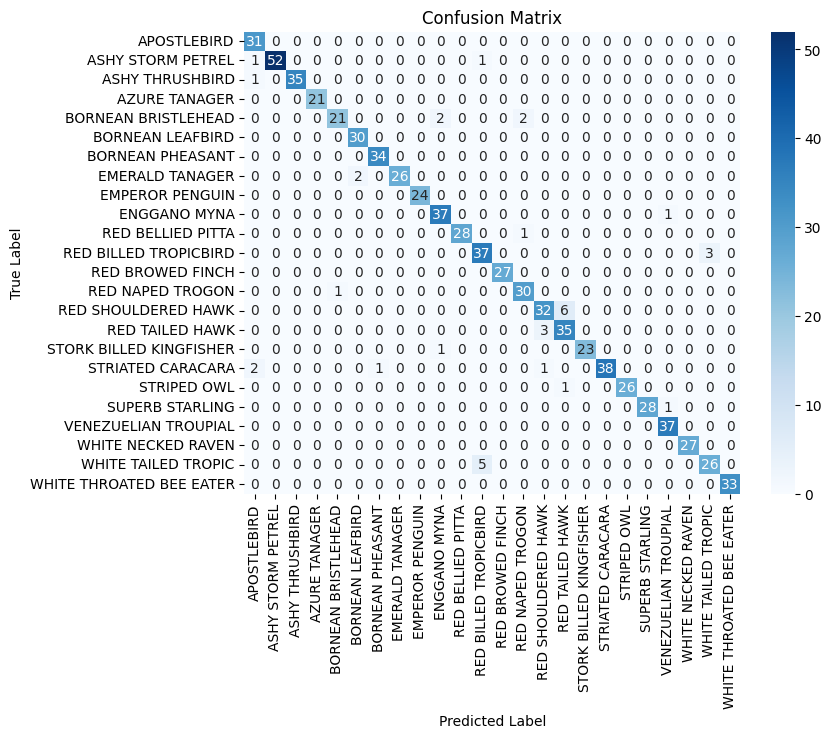

In [17]:
from collections import Counter

# Create a dictionary to store misclassifications for each true label
misclassifications = {}

# Iterate through incorrectly predicted instances
for features, true_label, predicted_label in zip(X_test, y_test, y_pred_test):
    if true_label != predicted_label:
        if true_label not in misclassifications:
            misclassifications[true_label] = Counter()
        misclassifications[true_label][predicted_label] += 1

# Print the most common misclassification for each true label
for true_label, misclassification_count in misclassifications.items():
    most_common_misclassification, count = misclassification_count.most_common(1)[0]
    print(f"Most common misclassification for label {true_label} was {most_common_misclassification}: {count}")

import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=sorted(set(y_test)), 
            yticklabels=sorted(set(y_pred_test)))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


<p> Let's take a look at the most common misclassification: RED SHOULDERED HAWK as RED TAILED HAWK </p>

**Original label: [RED SHOULDERED HAWK]**

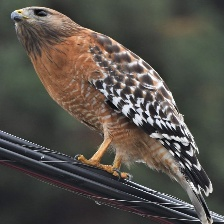

**Most common misclassification: [RED TAILED HAWK]**

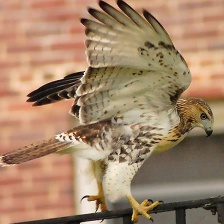

In [18]:
from IPython.display import Image
from IPython.display import Image, display, Markdown

# Display RED SHOULDERED HAWK image
display(Markdown("**Original label: [RED SHOULDERED HAWK]**"))
display(Image(filename="archive_exploration/train/RED SHOULDERED HAWK/007.jpg"))

# Display RED TAILED HAWK image
display(Markdown("**Most common misclassification: [RED TAILED HAWK]**"))
display(Image(filename="archive_exploration/train/RED TAILED HAWK/008.jpg"))

<style>
	p {
		line-height: 180%;
	}
</style>
<p>Conclusion:<p>
<p>The SVM seems to be working well when given a detailed imformation about the image, the reason why we see such a big change is that the pixel distribution was nowhere close to being sufficient amout of information for the model to be able to correctly classify other images.</p>


------------------------------------------------------

<style>
	p {
		line-height: 180%;
	}
</style>
<h3> Random Forest Approach </h3>
<h4> Pixel distribution </h4>
<p> We will attempt to use the pixel distribution with the Random Forest approach, for later comparison with feature vectors.</p>

In [19]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

def getPixelValueDistribution(image):
    img_plt = plt.imread(image)
    pixel_values = img_plt.flatten()
    # Calculate histogram
    hist, _ = np.histogram(pixel_values, bins=256, range=(0, 256), density=True)
    return hist

# Read the CSV file
rf_data = pd.read_csv('archive_exploration/birds.csv')

rf_data_train = rf_data
dfs = []
rf_df_train_pixel = pd.DataFrame(columns=['label', 'pixel_distribution'])

for index, row in rf_data_train.iterrows():
    image_path = './archive_exploration/' + row['filepaths']
    label = row['labels']

    if os.path.exists(image_path):
        histogram_data = getPixelValueDistribution(image_path)
        df = pd.DataFrame({'label': [label], 'pixel_distribution': [histogram_data]})
        dfs.append(df)
    
rf_df_train_pixel = pd.concat(dfs, ignore_index=True)

display(rf_df_train_pixel)

#use random forrest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = np.array(list(rf_df_train_pixel['pixel_distribution']))
y = np.array(rf_df_train_pixel['label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

random_forest_model.fit(X_train, y_train)

y_pred_train = random_forest_model.predict(X_train)
y_pred_test = random_forest_model.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Train Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)

label  \
0                  APOSTLEBIRD   
1                  APOSTLEBIRD   
2                  APOSTLEBIRD   
3                  APOSTLEBIRD   
4                  APOSTLEBIRD   
...                        ...   
3865  WHITE THROATED BEE EATER   
3866  WHITE THROATED BEE EATER   
3867  WHITE THROATED BEE EATER   
3868  WHITE THROATED BEE EATER   
3869  WHITE THROATED BEE EATER   

                                     pixel_distribution  
0     [0.0004849596088435374, 0.00017272534013605442...  
1     [0.0023185055272108845, 0.0012755102040816326,...  
2     [0.001634247448979592, 0.0015943877551020409, ...  
3     [0.0024845875850340138, 0.0008569834183673469,...  
4     [0.0005779655612244898, 0.000352093962585034, ...  
...                                                 ...  
3865  [0.01881377551020408, 0.005686649659863946, 0....  
3866  [0.0020195578231292518, 0.000744047619047619, ...  
3867  [0.028147587159863947, 0.01815609056122449, 0....  
3868  [0.0023982249149659862, 0.00042517006802721087...  
3869  [0.00023915816326530612, 5.978954081632653e-05...  

[3870 rows x 2 columns]

Train Accuracy: 1.0
Test Accuracy: 0.2713178294573643


<style>
	p {
		line-height: 180%;
	}
</style>
<h4>Feature vectors:</h4>
<p> We can see that the pixel distribution behaves poorly even when using a different model, so we can safely conclude the issue is with the method of learning not the model itself. We will now attempt to use the feature vector approach.</p>


In [20]:
print("\nTraining the model: \n\n")

#use random forrest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

X = np.array(list(rf_df_train['img_features']))
y = np.array(rf_df_train['label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

random_forest_model.fit(X_train, y_train)

#Print the train and test accuracy
y_pred_train = random_forest_model.predict(X_train)
y_pred_test = random_forest_model.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Train Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)


Training the model: 


Train Accuracy: 1.0
Test Accuracy: 0.9095607235142119


<style>
	p {
		line-height: 180%;
	}
</style>
<p> Conclusion </p>
<p>We can see that Random Forest behaves in a similar way as the SVM, poor when only provided with the pixel distribution data and decently when given the feature vector embeddings. However, this model clearly overfits, similarly to what we see with the SVM above. </p> 

??? - delete if we do not have time to reduce overfitting for Random Forest
<p>Since we have 2 very similarly performing models (SVM and Random Forrest), we decided to only try reducing overfitting for SVM and instead of trying to fix Random Forest we spent our time exploring and tuning the CNN model below.</p>
???

<h3> Manual testing  </h3>
<p> We will use the SVM approach to conduct a manual test, where we insert an image of a bird and the model will predict the label. </p>

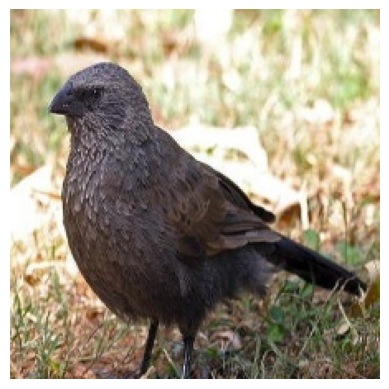

/Users/dksimmay/Documents/VIA/Semester6/MAL1/FeatherVision/venv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/dksimmay/Documents/VIA/Semester6/MAL1/FeatherVision/venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Predicted label: ['APOSTLEBIRD']


In [21]:
from utils import (
    detect_birds,
    get_model,
    load_image_from_path,
)

def predict_image_label(image, model, labels):
    # Convert image to array
    image_array = np.array(image)

    # Expand dimensions to match model input shape
    image_input = np.expand_dims(image_array, axis=0)

    # Make predictions
    predictions = model.predict(image_input)

    # Find the index of the maximum prediction
    max_index = np.argmax(predictions)

    # Get the predicted label
    predicted_label = labels[max_index]

    return predictions


def image_to_vectors(image):
    img2vec = Img2Vec()
    img_vectors = img2vec.get_vec(image)
    return img_vectors

detect_model = get_model()
base_path = "./archive_exploration/test/"
file_name = "APOSTLEBIRD_test.png"

# image = load_image_from_url(
#     "https://t3.ftcdn.net/jpg/04/94/54/48/360_F_494544876_Rx7zW6g6SrDMPama0eIH9A3yt7CJNVo2.jpg"
# )
img = load_image_from_path(base_path + file_name)
image_vectors = image_to_vectors(img)
i = detect_birds(img, detect_model, showOutput=False)
labels = rf_df_train['label'].unique()

predicted_label = predict_image_label(image_vectors, svm_model, labels)
print("Predicted label:", predicted_label)

------------------------

<h3>CNN aka NEURONKA</h3>

In [22]:
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator
from keras.api.layers import Dense, Dropout
from keras.api.callbacks import (
    EarlyStopping,
    ModelCheckpoint,
)
from keras.api.optimizers import Adam
from keras import Model
from keras import layers
from keras_preprocessing.image import ImageDataGenerator
from keras.api.callbacks import (
    EarlyStopping,
    ModelCheckpoint,
    ReduceLROnPlateau,
)

from pathlib import Path
import os.path

import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

from helper_functions import (
    walk_through_dir,
)

There are 24 directories and 0 images in './archive_exploration/train/'.
There are 0 directories and 175 images in './archive_exploration/train/WHITE TAILED TROPIC'.
There are 0 directories and 146 images in './archive_exploration/train/RED BELLIED PITTA'.
There are 0 directories and 164 images in './archive_exploration/train/ASHY THRUSHBIRD'.
There are 0 directories and 152 images in './archive_exploration/train/VENEZUELIAN TROUPIAL'.
There are 0 directories and 152 images in './archive_exploration/train/EMPEROR PENGUIN'.
There are 0 directories and 135 images in './archive_exploration/train/STORK BILLED KINGFISHER'.
There are 0 directories and 154 images in './archive_exploration/train/BORNEAN BRISTLEHEAD'.
There are 0 directories and 160 images in './archive_exploration/train/WHITE NECKED RAVEN'.
There are 0 directories and 143 images in './archive_exploration/train/STRIPED OWL'.
There are 0 directories and 196 images in './archive_exploration/train/STRIATED CARACARA'.
There are 0 d

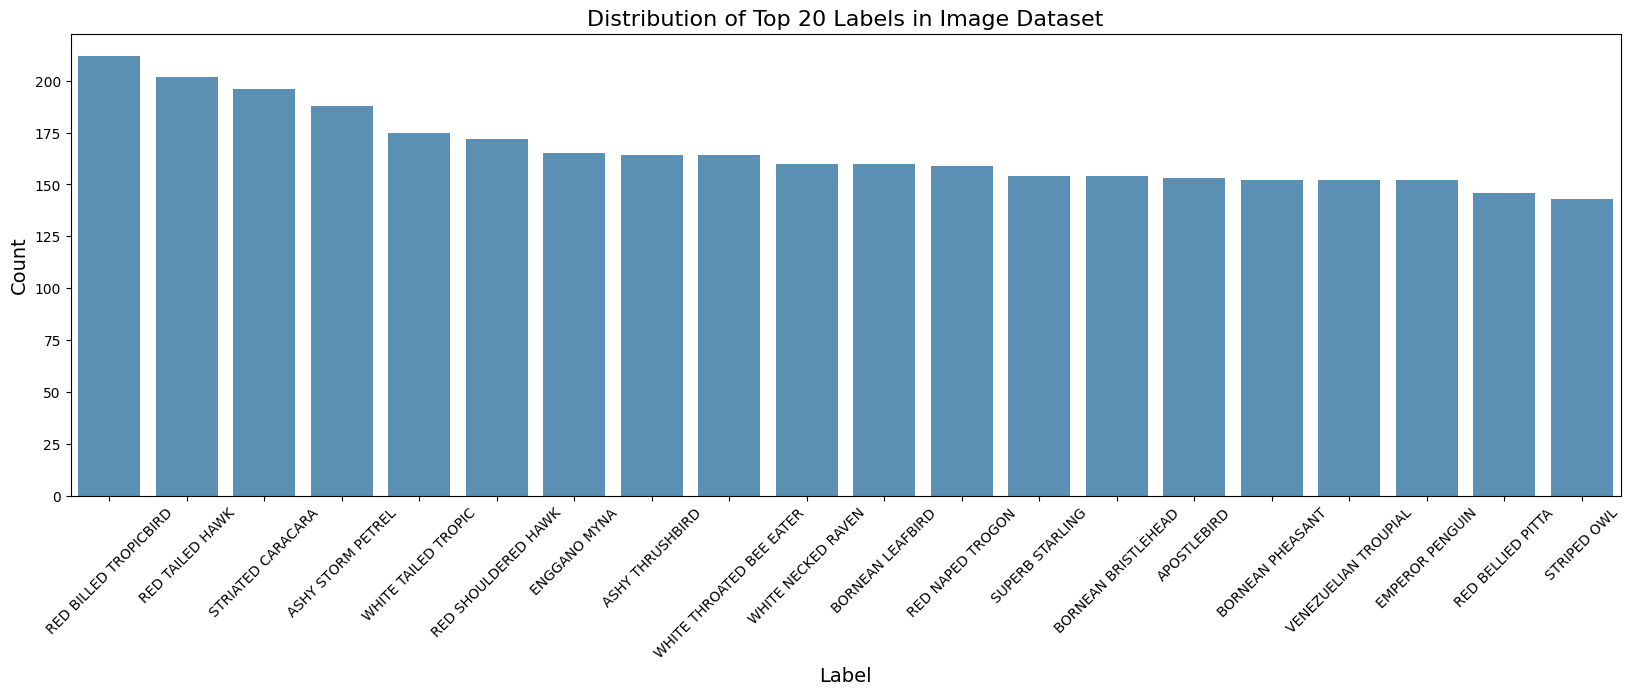

In [23]:
import pandas as pd 

BATCH_SIZE = 32
TARGET_SIZE = (224, 224)

# Walk through each directory
dataset = "./archive_exploration/train/"
walk_through_dir(dataset)

image_dir = Path(dataset)

# Get filepaths and labels
filepaths = (
    list(image_dir.glob(r"**/*.JPG"))
    + list(image_dir.glob(r"**/*.jpg"))
    + list(image_dir.glob(r"**/*.png"))
    + list(image_dir.glob(r"**/*.png"))
)

labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name="Filepath").astype(str)
labels = pd.Series(labels, name="Label")

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

# Get the top 20 labels
label_counts = image_df["Label"].value_counts()[:20]

plt.figure(figsize=(20, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, alpha=0.8)
plt.title("Distribution of Top 20 Labels in Image Dataset", fontsize=16)
plt.xlabel("Label", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.show()

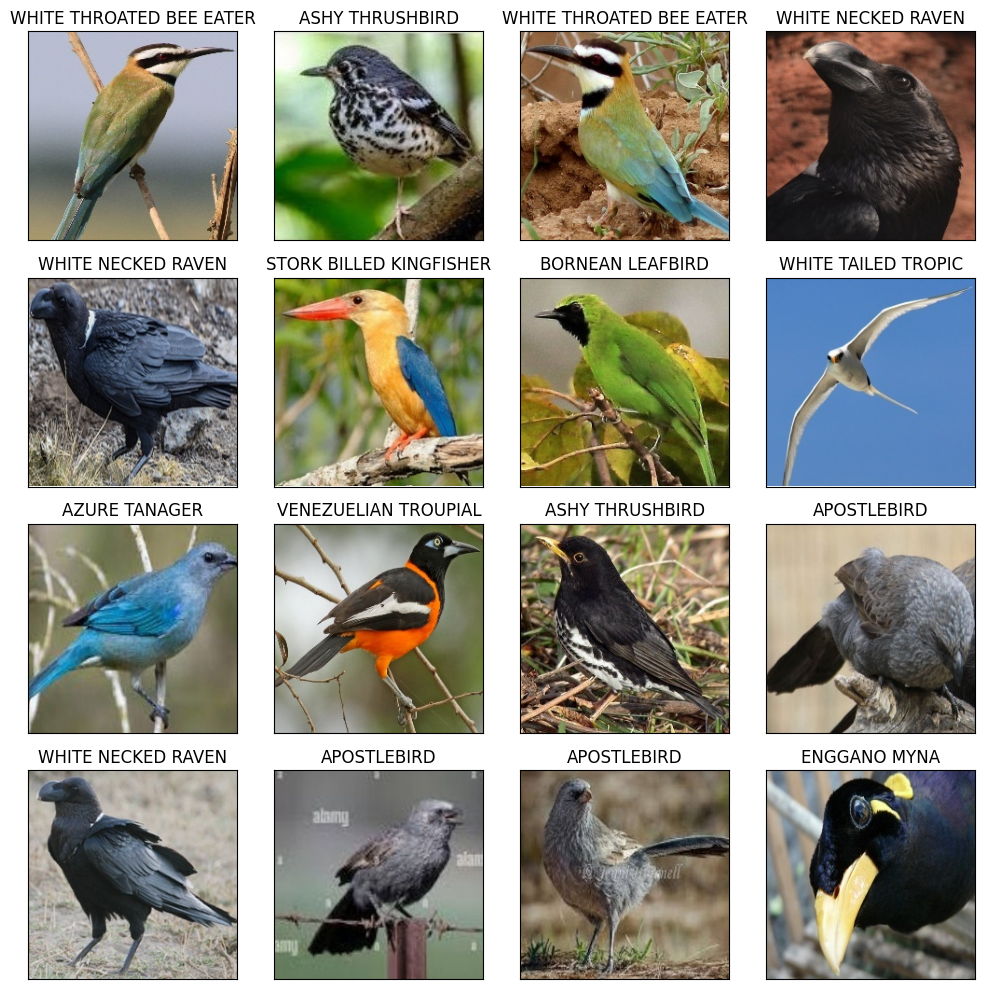

In [24]:
# Display 16 picture of the dataset with their labels
random_index = np.random.randint(0, len(image_df), 16)
fig, axes = plt.subplots(
    nrows=4, ncols=4, figsize=(10, 10), subplot_kw={"xticks": [], "yticks": []}
)

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[random_index[i]]))
    ax.set_title(image_df.Label[random_index[i]])
plt.tight_layout()
plt.show()

In [25]:
# Separate in train and test data
train_df, test_df = train_test_split(
    image_df, test_size=0.2, shuffle=True, random_state=42
)

train_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
    validation_split=0.2,
)

test_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
)

In [26]:
# Split the data into three categories.
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col="Filepath",
    y_col="Label",
    target_size=TARGET_SIZE,
    color_mode="rgb",
    class_mode="categorical",
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42,
    subset="training",
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col="Filepath",
    y_col="Label",
    target_size=TARGET_SIZE,
    color_mode="rgb",
    class_mode="categorical",
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42,
    subset="validation",
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col="Filepath",
    y_col="Label",
    target_size=TARGET_SIZE,
    color_mode="rgb",
    class_mode="categorical",
    batch_size=BATCH_SIZE,
    shuffle=False,
)

Found 2477 validated image filenames belonging to 24 classes.
Found 619 validated image filenames belonging to 24 classes.
Found 774 validated image filenames belonging to 24 classes.


In [27]:
# Data Augmentation Step
augment = tf.keras.Sequential(
    [
        layers.Resizing(224, 224),
        layers.Rescaling(1.0 / 255),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
        layers.RandomContrast(0.1),
    ]
)

# Load the pretained model
pretrained_model = tf.keras.applications.efficientnet.EfficientNetB0(
    input_shape=(224, 224, 3), include_top=False, weights="imagenet", pooling="max"
)

pretrained_model.trainable = False

In [28]:
# Create checkpoint callback
checkpoint_path = "birds_classification_model_checkpoint.weights.h5"
checkpoint_callback = ModelCheckpoint(
    checkpoint_path, save_weights_only=True, monitor="val_accuracy", save_best_only=True
)

# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
early_stopping = EarlyStopping(
    monitor="val_loss",  # watch the val loss metric
    patience=5,
    restore_best_weights=True,
)  # if val loss decreases for 3 epochs in a row, stop training

reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=3, min_lr=1e-6)

In [29]:
from helper_functions import create_tensorboard_callback

inputs = pretrained_model.input
x = augment(inputs)

x = Dense(128, activation="relu")(pretrained_model.output)
x = Dropout(0.45)(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.45)(x)


outputs = Dense(24, activation="softmax")(x)

model = Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer=Adam(0.0001), loss="categorical_crossentropy", metrics=["accuracy"]
)

history = model.fit(
    train_images,
    steps_per_epoch=len(train_images),
    validation_data=val_images,
    validation_steps=len(val_images),
    epochs=150,
    callbacks=[
        early_stopping,
        create_tensorboard_callback("training_logs", "bird_classification"),
        checkpoint_callback,
        reduce_lr,
    ],
)

results = model.evaluate(test_images, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

Saving TensorBoard log files to: training_logs/bird_classification/20240518-201755
Epoch 1/150


/Users/dksimmay/Documents/VIA/Semester6/MAL1/FeatherVision/venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


78/78 ━━━━━━━━━━━━━━━━━━━━ 28s 317ms/step - accuracy: 0.0587 - loss: 6.1829 - val_accuracy: 0.2084 - val_loss: 2.8613 - learning_rate: 1.0000e-04
Epoch 2/150


2024-05-18 20:18:23.657264: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-05-18 20:18:23.671329: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


AttributeError: 'NoneType' object has no attribute 'items'

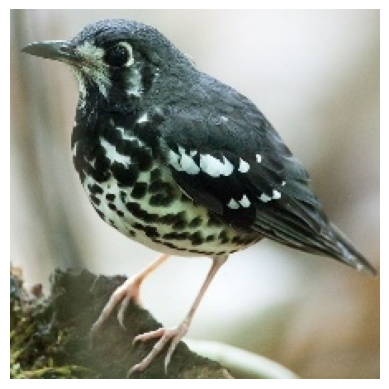

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted label: AZURE TANAGER


In [ ]:
from utils import (
    detect_birds,
    get_model,
    load_image_from_path,
)

def predict_image_label_cnn(image, model, labels):
    # Convert image to array
    image_array = np.array(image)

    # Expand dimensions to match model input shape
    image_input = np.expand_dims(image_array, axis=0)

    # Make predictions
    predictions = model.predict(image_input)

    # Get the predicted label
    predicted_label = labels[np.argmax(predictions[0])]

    return predicted_label

detect_model = get_model()
base_path = "./archive_exploration/test/"
file_name = "ASHY THRUSHBIRD_test.jpeg"

# image = load_image_from_url(
#     "https://t3.ftcdn.net/jpg/04/94/54/48/360_F_494544876_Rx7zW6g6SrDMPama0eIH9A3yt7CJNVo2.jpg"
# )
image2 = load_image_from_path(base_path + file_name)
i = detect_birds(image2, detect_model, showOutput=False)
labels = list(train_images.class_indices.keys())

predicted_label = predict_image_label_cnn(i, model, labels)
print("Predicted label:", predicted_label)

----------------------------------------------


In [ ]:
# Imports
from pathlib import Path
import pandas as pd
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

The code below uses a subset of the original dataset. The subset contains 21 of mostly european or well known species. It follows the same folder structure - the data is split into three separate folders (train, test, split) and corresponding data frames are created. <br>
BATCH_SIZE: Number of images to process at a time, helps determine the number of batches per epoch.<br>
TARGET_SIZE: The dimensions to which all images will be resized, should match the input size expected by the model.


In [ ]:
BATCH_SIZE = 32
TARGET_SIZE = (224, 224)

# Walk through each directory
raw_data_train = "./exploration_v2/train/"
raw_data_valid = "./exploration_v2/valid/"
raw_data_test = "./exploration_v2/test/"

# walk_through_dir(raw_data_train)
# walk_through_dir(raw_data_valid)
# walk_through_dir(raw_data_test)

def create_dataset_df(directory):
    image_dir = Path(directory)
    
    # Get filepaths and labels
    filepaths = (
        list(image_dir.glob(r"**/*.JPG")) +
        list(image_dir.glob(r"**/*.jpg")) +
        list(image_dir.glob(r"**/*.png")) +
        list(image_dir.glob(r"**/*.PNG"))
    )
    
    labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
    
    filepaths = pd.Series(filepaths, name="Filepath").astype(str)
    labels = pd.Series(labels, name="Label")
    
    # Concatenate filepaths and labels
    return pd.concat([filepaths, labels], axis=1)

# Create dataframes for train, valid, and test datasets
train_df = create_dataset_df(raw_data_train)
valid_df = create_dataset_df(raw_data_valid)
test_df = create_dataset_df(raw_data_test)

print("Train dataFrame: ", train_df.head())
print("Valid dataFrame: ", valid_df.head())
print("Test dataFrame: ", test_df.head())


Train dataFrame:                                  Filepath     Label
0  exploration_v2\train\BARN OWL\001.jpg  BARN OWL
1  exploration_v2\train\BARN OWL\002.jpg  BARN OWL
2  exploration_v2\train\BARN OWL\003.jpg  BARN OWL
3  exploration_v2\train\BARN OWL\004.jpg  BARN OWL
4  exploration_v2\train\BARN OWL\005.jpg  BARN OWL
Valid dataFrame:                                Filepath     Label
0  exploration_v2\valid\BARN OWL\1.jpg  BARN OWL
1  exploration_v2\valid\BARN OWL\2.jpg  BARN OWL
2  exploration_v2\valid\BARN OWL\3.jpg  BARN OWL
3  exploration_v2\valid\BARN OWL\4.jpg  BARN OWL
4  exploration_v2\valid\BARN OWL\5.jpg  BARN OWL
Test dataFrame:                               Filepath     Label
0  exploration_v2\test\BARN OWL\1.jpg  BARN OWL
1  exploration_v2\test\BARN OWL\2.jpg  BARN OWL
2  exploration_v2\test\BARN OWL\3.jpg  BARN OWL
3  exploration_v2\test\BARN OWL\4.jpg  BARN OWL
4  exploration_v2\test\BARN OWL\5.jpg  BARN OWL


In this step, preprocessing is done on the data frames. The ImageDataGenerator from TensorFlow's Keras API is responsible for preprocessing image data, data augmentation and supplying data to the model in batches during training. <br>
ImageDataGenerator parameters: 
- rescale: scales the image data from 0-255 to 0-1 by multiplying every pixel with 1./255
- rotation-range: a value in degrees, range in which to randomly rotate the pictures 
- width_shift_range: a fraction of total width in which to shift the image horizontally
- height_shift_range: same as width, but vertically
- shear_range: slants (stretches) the image in as radians
- zoom_range: ranges for random zoom
- horizontal_flip: randomly flips the image horizontally 
- fill_mode: specifies how the pixels outside of the input are filled ( f.ex. if an image is shifted to the right outside of the boundaries)

The augmentation parameters specified above introduce variability into the dataset, help to prevent overfitting and allow model to generalize better to new, unseen data. The augmentation is not applied to the test and validation data frames, since they are used to measure how the model performs on actual pictures.

In [ ]:

# Create image data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_test_datagen = ImageDataGenerator(rescale=1./255)  # No augmentation for validation and testing

# Create generators to read images from dataframe
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_generator = valid_test_datagen.flow_from_dataframe(
    dataframe=valid_df,
    x_col='Filepath',
    y_col='Label',
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = valid_test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 6516 validated image filenames belonging to 21 classes.
Found 210 validated image filenames belonging to 21 classes.
Found 210 validated image filenames belonging to 21 classes.


Model configuration
1. Conv2D layers: convolutional layers that will learn local patterns in images. For example edges in the first layer and increasingly complex elements in deeper layers. 
2. MaxPooling2D layers: use to reduce the dimensions of the feature maps. It reduces the number of parameters and computation in the network to control overfitting. 
3. Flatten layer: flattening transforms the format of the feature maps from a multi-dimensional tensor in a one-dimensional tensor. It unrolls the the spatial dimensions into a vector that can be fed into the fully connected Dense layer.
4. Dense layer: fully connected layers, which process patterns globally, as an entire image. The first Dense layer has 512 nodes.
5. Dropout layer: regularization method that randomly sets input units to 0 with the specified frequency to avoid overfitting.


In [ ]:

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(TARGET_SIZE[0], TARGET_SIZE[1], 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(train_df['Label'].unique()), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=validation_generator,
    steps_per_epoch=len(train_df) // BATCH_SIZE,
    validation_steps=len(valid_df) // BATCH_SIZE
)


Epoch 1/25
203/203 [==============================] - 266s 1s/step - loss: 2.7781 - accuracy: 0.1589 - val_loss: 1.9963 - val_accuracy: 0.3802
Epoch 2/25
203/203 [==============================] - 280s 1s/step - loss: 2.2568 - accuracy: 0.3064 - val_loss: 1.5413 - val_accuracy: 0.5417
Epoch 3/25
203/203 [==============================] - 289s 1s/step - loss: 1.9401 - accuracy: 0.4042 - val_loss: 1.3181 - val_accuracy: 0.5990
Epoch 4/25
203/203 [==============================] - 288s 1s/step - loss: 1.7324 - accuracy: 0.4682 - val_loss: 1.1587 - val_accuracy: 0.6302
Epoch 5/25
203/203 [==============================] - 288s 1s/step - loss: 1.5887 - accuracy: 0.4980 - val_loss: 1.0543 - val_accuracy: 0.6510
Epoch 6/25
203/203 [==============================] - 293s 1s/step - loss: 1.4729 - accuracy: 0.5390 - val_loss: 0.8439 - val_accuracy: 0.7344
Epoch 7/25
203/203 [==============================] - 287s 1s/step - loss: 1.3975 - accuracy: 0.5625 - val_loss: 0.8658 - val_accuracy: 0.7135

In [ ]:
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_df) // BATCH_SIZE)
print(f'Test accuracy: {test_acc}')


6/6 [==============================] - 2s 240ms/step - loss: 0.4294 - accuracy: 0.8490
Test accuracy: 0.8489583134651184


<h2>Neuronka feature vectors - Simon</h2>

Here we convert our train, validation, and test data into image feature vectors, as we have seen that those were a good source of information for our models above:

In [31]:
from img2vec_pytorch import Img2Vec
import pandas as pd
from PIL import Image
import os

img2vec = Img2Vec()

raw_data_train = "./exploration_v2/train/"
raw_data_valid = "./exploration_v2/valid/"
raw_data_test = "./exploration_v2/test/"

def create_dataset_df(directory):
    image_dir = Path(directory)
    
    # Get filepaths and labels
    filepaths = (
        list(image_dir.glob(r"**/*.JPG")) +
        list(image_dir.glob(r"**/*.jpg")) +
        list(image_dir.glob(r"**/*.png")) +
        list(image_dir.glob(r"**/*.PNG"))
    )
    
    labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
    
    filepaths = pd.Series(filepaths, name="Filepath").astype(str)
    labels = pd.Series(labels, name="Label")
    
    # Concatenate filepaths and labels
    return pd.concat([filepaths, labels], axis=1)

# Create dataframes for train, valid, and test datasets
train_df = create_dataset_df(raw_data_train)
valid_df = create_dataset_df(raw_data_valid)
test_df = create_dataset_df(raw_data_test)

rf_df_train = pd.DataFrame(columns=["label", "img_features"])
rf_df_valid = pd.DataFrame(columns=["label", "img_features"])
rf_df_test = pd.DataFrame(columns=["label", "img_features"])

train_dfs = []
valid_dfs = []
test_dfs = []

for index, row in train_df.iterrows():
    image_path = row["Filepath"]
    label = row["Label"]
    print("processing image:", image_path)
    
    if os.path.exists(image_path):
        print("processing image:", image_path)
        img = Image.open(image_path)
        img_features = img2vec.get_vec(img)
        df = pd.DataFrame({"label": [label], "img_features": [img_features]})
        train_dfs.append(df)

rf_df_train = pd.concat(train_dfs, ignore_index=True)

for index, row in valid_df.iterrows():
    image_path = row["Filepath"]
    label = row["Label"]

    if os.path.exists(image_path):
        print("processing image:", image_path)
        img = Image.open(image_path)
        img_features = img2vec.get_vec(img)
        df = pd.DataFrame({"label": [label], "img_features": [img_features]})
        valid_dfs.append(df)

rf_df_valid = pd.concat(valid_dfs, ignore_index=True)

for index, row in test_df.iterrows():
    image_path = row["Filepath"]
    label = row["Label"]

    if os.path.exists(image_path):
        print("processing image:", image_path)
        img = Image.open(image_path)
        img_features = img2vec.get_vec(img)
        df = pd.DataFrame({"label": [label], "img_features": [img_features]})
        test_dfs.append(df)

rf_df_test = pd.concat(test_dfs, ignore_index=True)


display(rf_df_train)
display(rf_df_valid)
display(rf_df_test)

processing image: exploration_v2/train/EUROPEAN GOLDFINCH/016.jpg
processing image: exploration_v2/train/EUROPEAN GOLDFINCH/016.jpg
processing image: exploration_v2/train/EUROPEAN GOLDFINCH/002.jpg
processing image: exploration_v2/train/EUROPEAN GOLDFINCH/002.jpg
processing image: exploration_v2/train/EUROPEAN GOLDFINCH/003.jpg
processing image: exploration_v2/train/EUROPEAN GOLDFINCH/003.jpg
processing image: exploration_v2/train/EUROPEAN GOLDFINCH/017.jpg
processing image: exploration_v2/train/EUROPEAN GOLDFINCH/017.jpg
processing image: exploration_v2/train/EUROPEAN GOLDFINCH/029.jpg
processing image: exploration_v2/train/EUROPEAN GOLDFINCH/029.jpg
processing image: exploration_v2/train/EUROPEAN GOLDFINCH/001.jpg
processing image: exploration_v2/train/EUROPEAN GOLDFINCH/001.jpg
processing image: exploration_v2/train/EUROPEAN GOLDFINCH/015.jpg
processing image: exploration_v2/train/EUROPEAN GOLDFINCH/015.jpg
processing image: exploration_v2/train/EUROPEAN GOLDFINCH/014.jpg
processing

label                                       img_features
0       EUROPEAN GOLDFINCH  [0.37306967, 0.78396887, 1.3658797, 1.7935523,...
1       EUROPEAN GOLDFINCH  [0.2240942, 0.58462757, 0.22185497, 1.6301553,...
2       EUROPEAN GOLDFINCH  [1.0432264, 1.2850966, 1.5710851, 1.3904763, 0...
3       EUROPEAN GOLDFINCH  [0.7072212, 1.0092304, 1.177942, 1.8037748, 1....
4       EUROPEAN GOLDFINCH  [1.1538839, 1.7550648, 1.6679658, 0.33979985, ...
...                    ...                                                ...
3253  RING-NECKED PHEASANT  [0.7511478, 0.23938957, 0.77195895, 0.77276593...
3254  RING-NECKED PHEASANT  [0.0460134, 0.4618488, 1.0837246, 0.57114214, ...
3255  RING-NECKED PHEASANT  [1.5058447, 0.29766193, 1.1393183, 1.639394, 0...
3256  RING-NECKED PHEASANT  [1.0387826, 0.0869874, 0.9288923, 0.31262347, ...
3257  RING-NECKED PHEASANT  [0.29898623, 0.09908733, 0.64091605, 1.1657956...

[3258 rows x 2 columns]

label                                       img_features
0      EUROPEAN GOLDFINCH  [1.17142, 1.2821192, 0.18820831, 0.5940055, 0....
1      EUROPEAN GOLDFINCH  [0.5418698, 1.6646713, 1.4178957, 0.56325233, ...
2      EUROPEAN GOLDFINCH  [0.41654634, 1.3906165, 1.4868424, 0.5325054, ...
3      EUROPEAN GOLDFINCH  [0.42880896, 0.84382063, 0.94694257, 1.5085397...
4      EUROPEAN GOLDFINCH  [0.9364462, 0.76760906, 1.7847728, 0.50437975,...
..                    ...                                                ...
100  RING-NECKED PHEASANT  [1.3949764, 0.12177449, 0.88219607, 0.10637648...
101  RING-NECKED PHEASANT  [1.5821198, 0.10405355, 1.1750772, 0.6743846, ...
102  RING-NECKED PHEASANT  [0.6908582, 0.27333182, 1.3543888, 0.5740807, ...
103  RING-NECKED PHEASANT  [0.86563677, 0.47088093, 1.1261303, 0.6139457,...
104  RING-NECKED PHEASANT  [1.3358746, 0.2782391, 1.20465, 0.8484172, 0.1...

[105 rows x 2 columns]

label                                       img_features
0      EUROPEAN GOLDFINCH  [1.0698975, 1.3422195, 0.7073389, 1.320967, 1....
1      EUROPEAN GOLDFINCH  [0.48462054, 0.49104407, 0.62186134, 0.8922248...
2      EUROPEAN GOLDFINCH  [1.0231843, 0.99358606, 0.7195828, 0.5835694, ...
3      EUROPEAN GOLDFINCH  [0.4212021, 0.8446172, 0.95161, 1.8264242, 0.5...
4      EUROPEAN GOLDFINCH  [0.59801745, 0.41274032, 0.8268852, 1.1442173,...
..                    ...                                                ...
100  RING-NECKED PHEASANT  [0.56589097, 0.020305658, 1.1870799, 1.1449729...
101  RING-NECKED PHEASANT  [0.55465174, 0.28697053, 0.9302879, 0.0934995,...
102  RING-NECKED PHEASANT  [0.99868053, 0.1666546, 1.3161229, 1.0443232, ...
103  RING-NECKED PHEASANT  [1.2163681, 0.05372068, 0.8348002, 0.43678123,...
104  RING-NECKED PHEASANT  [1.4474014, 0.22792375, 0.77690107, 1.1362733,...

[105 rows x 2 columns]

Now we just need to convert the dataframes into a correct format so that the NN can learn from them:

In [34]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential

rf_df_train["img_features"] = rf_df_train["img_features"].apply(lambda x: np.array(x))
rf_df_valid["img_features"] = rf_df_valid["img_features"].apply(lambda x: np.array(x))
rf_df_test["img_features"] = rf_df_test["img_features"].apply(lambda x: np.array(x))

X_train = np.array(rf_df_train["img_features"].tolist())
y_train = rf_df_train["label"]

X_valid = np.array(rf_df_valid["img_features"].tolist())
y_valid = rf_df_valid["label"]

X_test = np.array(rf_df_test["img_features"].tolist())
y_test = rf_df_test["label"]

#encode labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_valid = label_encoder.transform(y_valid)
y_test = label_encoder.transform(y_test)

y_train_categorical = to_categorical(y_train)
y_valid_categorical = to_categorical(y_valid)
y_test_categorical = to_categorical(y_test)


model = Sequential()
model.add(Dense(128, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(len(label_encoder.classes_), activation="softmax"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

history = model.fit(
    X_train,
    y_train_categorical,
    epochs=25,
    validation_data=(X_valid, y_valid_categorical),
    batch_size=32,
)

#validation accuracy
val_loss, val_acc = model.evaluate(X_valid, y_valid_categorical, batch_size=32)
test_loss, test_acc = model.evaluate(X_test, y_test_categorical, batch_size=BATCH_SIZE)

print(f"Validation accuracy: {val_acc}")
print(f"Test accuracy: {test_acc}")


Epoch 1/25


/Users/dksimmay/Documents/VIA/Semester6/MAL1/FeatherVision/venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1065 - loss: 3.1518 - val_accuracy: 0.6667 - val_loss: 1.4591
Epoch 2/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4484 - loss: 1.7803 - val_accuracy: 0.8762 - val_loss: 0.5375
Epoch 3/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6498 - loss: 1.0823 - val_accuracy: 0.9619 - val_loss: 0.2794
Epoch 4/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6939 - loss: 0.8762 - val_accuracy: 0.9429 - val_loss: 0.1598
Epoch 5/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7328 - loss: 0.7500 - val_accuracy: 0.9238 - val_loss: 0.1597
Epoch 6/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7798 - loss: 0.6377 - val_accuracy: 0.9524 - val_loss: 0.1222
Epoch 7/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8130 - loss: 0.5430 - val_accuracy: 0.9619 - val_loss: 0.1190
Epoch 8/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8239 - loss: 0.5258 - val_accuracy: 0.9905 - val_

We can see that this gives us the best results yet, let's see the learning curves:

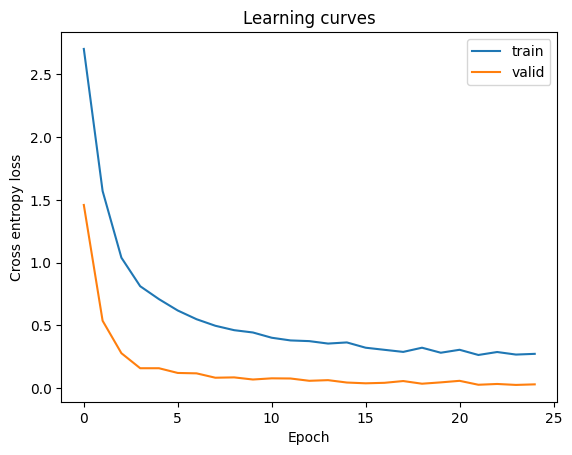

In [35]:
plt.figure()
plt.title("Learning curves")
plt.xlabel("Epoch")
plt.ylabel("Cross entropy loss")
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="valid")
plt.legend()
plt.show()